In [115]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import keras
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import tensorflow as tf

In [116]:
df="/kaggle/input/fruit-recognition/train/train"

In [117]:
training_data=keras.utils.image_dataset_from_directory(
    df,
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(100,100),
    shuffle=True,
    seed=123,
    validation_split=0.2, 
    subset='training',
    
)
validation_data=keras.utils.image_dataset_from_directory(
    df,
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(100, 100),
    shuffle=True,
    seed=123,
    validation_split=0.2,
    subset='validation',
    
)

Found 16854 files belonging to 33 classes.
Using 13484 files for training.
Found 16854 files belonging to 33 classes.
Using 3370 files for validation.


In [118]:
for vimg, vlabel in validation_data.take(1):
    imd=vimg
    labd=vlabel

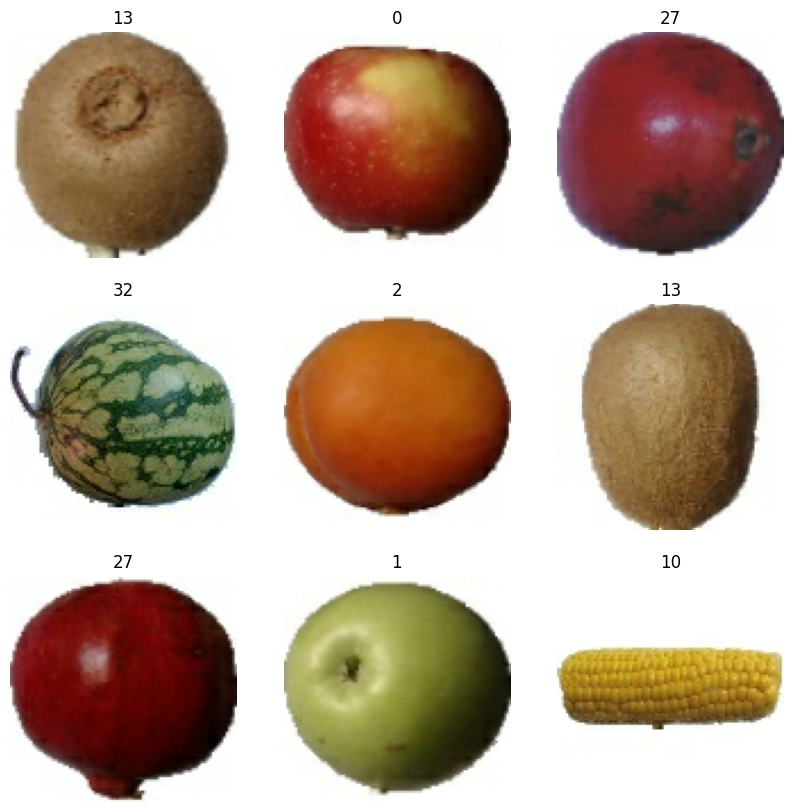

In [129]:

for images, labels in validation_data.take(1):  

    plt.figure(figsize=(10, 10))
    for i in range(9):  # Display first 9 images
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")
    plt.show()


In [10]:
from keras.layers import Dense,Flatten,MaxPooling2D,Conv2D,Input,BatchNormalization
from keras.models import Model
from keras.initializers import HeNormal
from keras.regularizers import l2

In [93]:
inputs=Input(shape=(100,100,3))
c=Conv2D(32,(3,3),activation="relu",padding='same',kernel_initializer=HeNormal(),kernel_regularizer=l2(0.01))(inputs)
c=Conv2D(32,(3,3),activation="relu",padding='same',kernel_initializer=HeNormal(),kernel_regularizer=l2(0.01))(c)
m=MaxPooling2D(2,2)(c)
b=BatchNormalization()(m)

f=Flatten()(b)
d=Dense(32,activation="relu")(f)
outputs=Dense(33,activation="softmax")(d)
model=Model(inputs,outputs)
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=["accuracy"])

In [96]:
imd.shape

TensorShape([32, 100, 100, 3])

In [97]:
model.fit(training_data,epochs=5,validation_data=validation_data)

Epoch 1/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 17s 27ms/step - accuracy: 0.1517 - loss: 4.6135 - val_accuracy: 0.2421 - val_loss: 5.8048
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.3617 - loss: 2.8617 - val_accuracy: 0.3861 - val_loss: 5.3011
Epoch 3/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.5158 - loss: 2.1173 - val_accuracy: 0.5273 - val_loss: 1.8385
Epoch 4/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.5667 - loss: 1.7328 - val_accuracy: 0.6525 - val_loss: 1.5483
Epoch 5/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.6960 - loss: 1.3091 - val_accuracy: 0.7496 - val_loss: 1.0783


In [101]:
loss,accuracy=model.evaluate(validation_data)
y_pred1=model.predict(imd)
print("Predicted value\n",np.argmax(y_pred1[0]))

print("Original value\n",vlabeln[0])


106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7439 - loss: 1.0824
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted value
 32
Original value
 tf.Tensor(32, shape=(), dtype=int32)


In [102]:
# vlabeln

In [103]:
inputs=Input(shape=(100,100,3))
c=Conv2D(32,(3,3),activation="relu",padding='same',kernel_initializer=HeNormal(),kernel_regularizer=l2(0.01))(inputs)
c=Conv2D(32,(3,3),activation="relu",padding='same',kernel_initializer=HeNormal(),kernel_regularizer=l2(0.01))(c)
m=MaxPooling2D(2,2)(c)
b=BatchNormalization()(m)
c=Conv2D(32,(3,3),activation="relu",padding='same',kernel_initializer=HeNormal(),kernel_regularizer=l2(0.01))(b)
c=Conv2D(32,(3,3),activation="relu",padding='same',kernel_initializer=HeNormal(),kernel_regularizer=l2(0.01))(c)
m=MaxPooling2D(2,2)(c)
b=BatchNormalization()(m)
f=Flatten()(b)
d=Dense(32,activation="relu")(f)
outputs=Dense(33,activation="softmax")(d)
modelc4=Model(inputs,outputs)
modelc4.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=["accuracy"])

In [104]:
modelc4.fit(training_data,epochs=5,validation_data=validation_data)

Epoch 1/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 17s 29ms/step - accuracy: 0.6629 - loss: 3.4191 - val_accuracy: 0.9917 - val_loss: 1.4604
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.9930 - loss: 1.2897 - val_accuracy: 0.5843 - val_loss: 11.5917
Epoch 3/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.9920 - loss: 0.8763 - val_accuracy: 0.5297 - val_loss: 4.0132
Epoch 4/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.9886 - loss: 0.6318 - val_accuracy: 0.9792 - val_loss: 0.5506
Epoch 5/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.9872 - loss: 0.5002 - val_accuracy: 0.9270 - val_loss: 0.8809


In [105]:
loss2,accuracy2=modelc4.evaluate(validation_data)
y_pred2=modelc4.predict(imd)
print("Predicted value\n",np.argmax(y_pred2[0]))

print("Original value\n",vlabeln[0])


106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9330 - loss: 0.8459
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step
Predicted value
 32
Original value
 tf.Tensor(32, shape=(), dtype=int32)


In [106]:
inputs=Input(shape=(100,100,3))
c=Conv2D(32,(3,3),activation="relu",padding='same',kernel_initializer=HeNormal(),kernel_regularizer=l2(0.01))(inputs)
c=Conv2D(32,(3,3),activation="relu",padding='same',kernel_initializer=HeNormal(),kernel_regularizer=l2(0.01))(c)
m=MaxPooling2D(2,2)(c)
b=BatchNormalization()(m)

c=Conv2D(32,(3,3),activation="relu",padding='same',kernel_initializer=HeNormal(),kernel_regularizer=l2(0.01))(b)
c=Conv2D(32,(3,3),activation="relu",padding='same',kernel_initializer=HeNormal(),kernel_regularizer=l2(0.01))(c)
m=MaxPooling2D(2,2)(c)
b=BatchNormalization()(m)

c=Conv2D(32,(3,3),activation="relu",padding='same',kernel_initializer=HeNormal(),kernel_regularizer=l2(0.01))(b)
c=Conv2D(32,(3,3),activation="relu",padding='same',kernel_initializer=HeNormal(),kernel_regularizer=l2(0.01))(c)
m=MaxPooling2D(2,2)(c)
b=BatchNormalization()(m)

c=Conv2D(32,(3,3),activation="relu",padding='same',kernel_initializer=HeNormal(),kernel_regularizer=l2(0.01))(b)
c=Conv2D(32,(3,3),activation="relu",padding='same',kernel_initializer=HeNormal(),kernel_regularizer=l2(0.01))(c)
m=MaxPooling2D(2,2)(c)
b=BatchNormalization()(m)

f=Flatten()(b)
d=Dense(32,activation="relu")(f)
outputs=Dense(33,activation="softmax")(d)
modelc8=Model(inputs,outputs)
modelc8.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=["accuracy"])

In [107]:
modelc8.fit(training_data,epochs=5,validation_data=validation_data)

Epoch 1/5
  8/422 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - accuracy: 0.0724 - loss: 8.7254

W0000 00:00:1723905653.728319    1029 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7697 - loss: 5.1574

W0000 00:00:1723905665.260768    1028 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1723905666.288783    1028 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


422/422 ━━━━━━━━━━━━━━━━━━━━ 22s 34ms/step - accuracy: 0.7701 - loss: 5.1539 - val_accuracy: 0.2831 - val_loss: 4.8210
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - accuracy: 0.9859 - loss: 1.5192 - val_accuracy: 0.9843 - val_loss: 0.8593
Epoch 3/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - accuracy: 0.9937 - loss: 0.6861 - val_accuracy: 0.8519 - val_loss: 0.8060
Epoch 4/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - accuracy: 0.9963 - loss: 0.3553 - val_accuracy: 0.6757 - val_loss: 2.0775
Epoch 5/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - accuracy: 0.9932 - loss: 0.2955 - val_accuracy: 0.6920 - val_loss: 1.4245


In [114]:
loss3,accuracy3=modelc8.evaluate(validation_data)
y_pred3=modelc8.predict(imd)
print("Predicted value\n",np.argmax(y_pred3[0]))

print("Original value\n",labd)


106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6987 - loss: 1.4268
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted value
 10
Original value
 tf.Tensor(
[32 29 16  1 26 16 30 32 29 32 31 25 13 19 20  0  2  8 22  5 20 26 25 14
 19 20 11 24 18 31 24 12], shape=(32,), dtype=int32)


In [121]:
y_pred=modelc8.predict(imd)

predicted_class_index = np.argmax(y_pred[10])
print("predicted value:",predicted_class_index)
print("original value:",labd[10])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
predicted value: 27
original value: tf.Tensor(27, shape=(), dtype=int32)


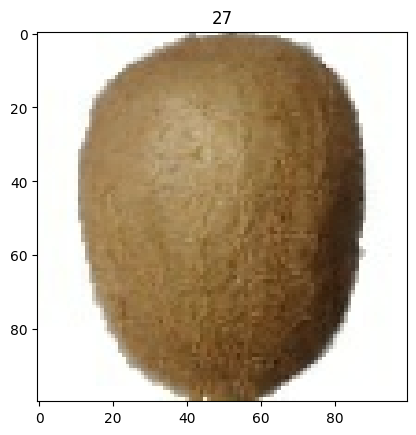

In [125]:
plt.imshow(imd[27].numpy().astype('uint64'))
plt.title(f"{labd[10]}")
plt.show()

In [127]:
import os

directory_path = "/kaggle/input/fruit-recognition/train/train"

subdirectories = [name for name in os.listdir(directory_path) if os.path.isdir(os.path.join(directory_path, name))]

print("Subdirectories:", subdirectories)
sub_df=pd.DataFrame(subdirectories,columns=["Names"])

Subdirectories: ['Orange', 'Tomato', 'Passion Fruit', 'Cucumber Ripe', 'Cactus fruit', 'Pomegranate', 'Plum', 'Pineapple', 'Papaya', 'Potato Red', 'Kiwi', 'Limes', 'Apple Braeburn', 'Pear', 'Onion White', 'Strawberry', 'Grape Blue', 'Blueberry', 'Apple Granny Smith', 'Apricot', 'Pepper Red', 'Clementine', 'Lemon', 'Avocado', 'Raspberry', 'Cantaloupe', 'Peach', 'Corn', 'Banana', 'Cherry', 'Pepper Green', 'Watermelon', 'Mango']


In [128]:
sub_df

,Names
0,Orange
1,Tomato
2,Passion Fruit
3,Cucumber Ripe
4,Cactus fruit
5,Pomegranate
6,Plum
7,Pineapple
8,Papaya
9,Potato Red
